# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.110478e+01     7.304596e+00
 * time: 0.002949953079223633
     1     2.792555e+01     3.688231e+00
 * time: 0.013399839401245117
     2     1.863729e+01     3.778153e+00
 * time: 0.025920867919921875
     3     1.212035e+01     1.921747e+00
 * time: 0.03844904899597168
     4     1.092483e+01     1.942914e+00
 * time: 0.048471927642822266
     5     1.046079e+01     1.748771e+00
 * time: 0.05864906311035156
     6     9.799760e+00     1.232926e+00
 * time: 0.06918597221374512
     7     9.206308e+00     1.071681e+00
 * time: 0.0794210433959961
     8     8.658760e+00     1.083795e+00
 * time: 0.08956098556518555
     9     8.289942e+00     6.778713e-01
 * time: 0.09975004196166992
    10     8.121765e+00     6.666828e-01
 * time: 0.11000704765319824
    11     8.042855e+00     5.213168e-01
 * time: 0.12054204940795898
    12     7.977313e+00     6.171473e-01
 * time: 0.12846994400024414
    13     7.951763e+00     5.482251e-01
 * ti

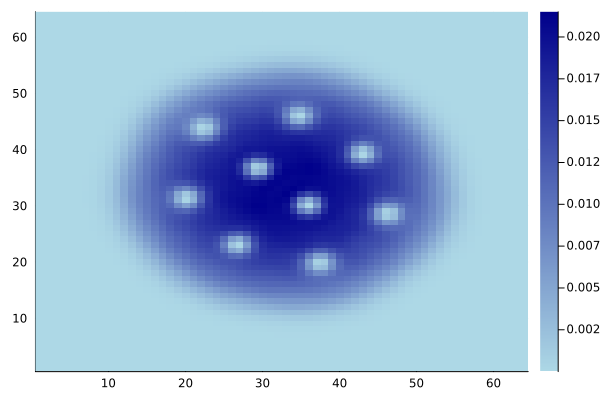

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)